In [6]:
import intake
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy
import dask

In [7]:
catalog = intake.open_catalog('nwa_catalog.yml')
entries = list(catalog)
entries

['thetao', 'tos']

In [8]:
ds = catalog['tos'].to_dask()
ds

/home/users/rhs/miniforge-pypy3/envs/xp/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 26GB
Dimensions:     (time: 9861, nv: 2, yh: 845, xh: 775)
Coordinates:
  * nv          (nv) float64 16B 1.0 2.0
  * time        (time) datetime64[ns] 79kB 1993-01-01T12:00:00 ... 2019-12-31...
  * xh          (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
  * yh          (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
Data variables:
    average_DT  (time) timedelta64[ns] 79kB dask.array<chunksize=(50,), meta=np.ndarray>
    average_T1  (time) datetime64[ns] 79kB dask.array<chunksize=(50,), meta=np.ndarray>
    average_T2  (time) datetime64[ns] 79kB dask.array<chunksize=(50,), meta=np.ndarray>
    time_bnds   (time, nv) datetime64[ns] 158kB dask.array<chunksize=(50, 2), meta=np.ndarray>
    tos         (time, yh, xh) float32 26GB dask.array<chunksize=(125, 95, 88), meta=np.ndarray>
Attributes:
    NCO:                 netCDF Operators version 4.8.1 (Homepage = http://nc...
    NumFilesInSet:       1
    associated_files:    areacello: 19930101.ocean_static.nc
    external_variables:  areacello
    grid_tile:           N/A
    grid_type:           regular
    history:             Thu Sep  5 12:56:30 2024: ncks -4 -L 3 --cnk_dmn tim...
    title:               NWA12_COBALT_2023_04_kpo4-coastatten-physics

In [9]:
ds = ds.assign_coords(latitude=ds.yh, longitude=ds.xh)
ds

<xarray.Dataset> Size: 26GB
Dimensions:     (time: 9861, nv: 2, yh: 845, xh: 775)
Coordinates:
  * nv          (nv) float64 16B 1.0 2.0
  * time        (time) datetime64[ns] 79kB 1993-01-01T12:00:00 ... 2019-12-31...
  * xh          (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
  * yh          (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
    latitude    (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
    longitude   (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
Data variables:
    average_DT  (time) timedelta64[ns] 79kB dask.array<chunksize=(50,), meta=np.ndarray>
    average_T1  (time) datetime64[ns] 79kB dask.array<chunksize=(50,), meta=np.ndarray>
    average_T2  (time) datetime64[ns] 79kB dask.array<chunksize=(50,), meta=np.ndarray>
    time_bnds   (time, nv) datetime64[ns] 158kB dask.array<chunksize=(50, 2), meta=np.ndarray>
    tos         (time, yh, xh) float32 26GB dask.array<chunksize=(125, 95, 88), meta=np.ndarray>
Attributes:
    NCO:                 netCDF Operators version 4.8.1 (Homepage = http://nc...
    NumFilesInSet:       1
    associated_files:    areacello: 19930101.ocean_static.nc
    external_variables:  areacello
    grid_tile:           N/A
    grid_type:           regular
    history:             Thu Sep  5 12:56:30 2024: ncks -4 -L 3 --cnk_dmn tim...
    title:               NWA12_COBALT_2023_04_kpo4-coastatten-physics

In [10]:
xmin = dask.array.min(ds['longitude'])
xmax = dask.array.max(ds['longitude'])
ymin = dask.array.min(ds['latitude'])
ymax = dask.array.max(ds['latitude'])

In [13]:
slice=ds['tos'].sel(time='2019-12-25T12:00:00', method='nearest')
slice

<xarray.DataArray 'tos' (yh: 845, xh: 775)> Size: 3MB
dask.array<getitem, shape=(845, 775), dtype=float32, chunksize=(95, 88), chunktype=numpy.ndarray>
Coordinates:
    time       datetime64[ns] 8B 2019-12-25T12:00:00
  * xh         (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
  * yh         (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
    latitude   (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
    longitude  (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area:mean yh:mean xh:mean time: mean
    long_name:      Sea Surface Temperature
    standard_name:  sea_surface_temperature
    time_avg_info:  average_T1,average_T2,average_DT
    units:          degC

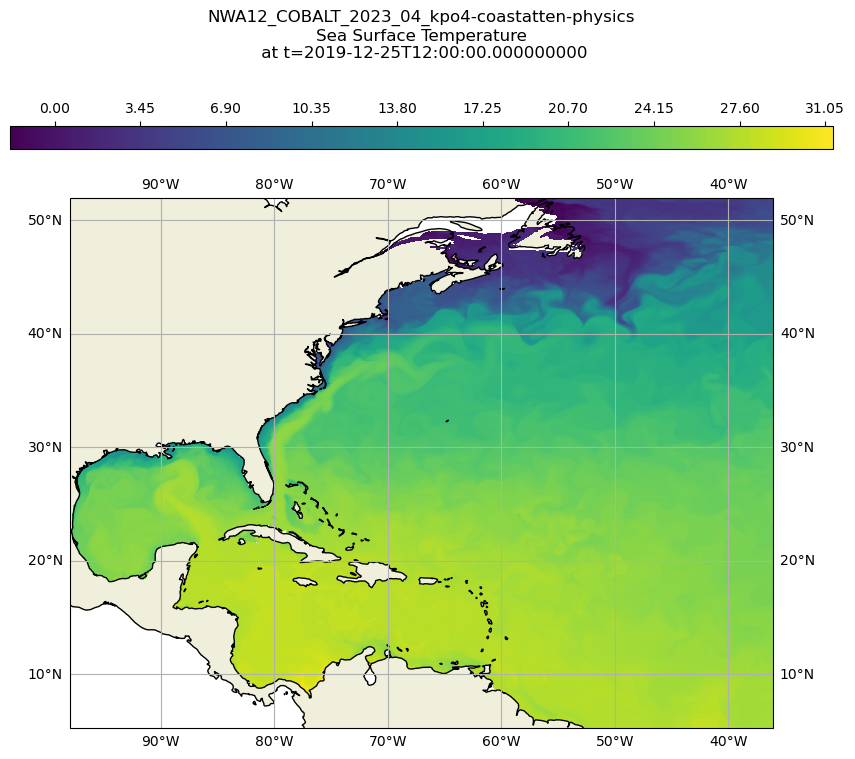

In [18]:
aspect = (xmax-xmin)/(ymax-ymin)
plt.figure(figsize=(8*aspect,8))
proj = ccrs.PlateCarree(central_longitude=180)
proj180 = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.set_extent([xmin, xmax, ymin, ymax], crs=proj180)
# add some features to make the map a little more polished
ax.add_feature(cartopy.feature.LAND)
# ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines('50m')
gl = ax.gridlines(draw_labels=True)
ct = ax.contourf(ds['longitude'], ds['latitude'], slice, levels=255, transform=proj180)
plt.colorbar(ct, orientation='horizontal',pad=0.08, aspect=35, fraction=.06, location='top')
plt.title(str(ds.attrs['title']) + '\n' + str(slice.attrs['long_name']) + '\n at t=' + str(slice['time'].values), y=1.25)
plt.show()